# Problem
Given the different datasets of a news channel which include business,entertainment,sports,technology and politics
we have to analyse and see all the news and generate a summary for BBC news channel

## Initial Analysis



- we need to ,create a dataset of each type of the news in bbc where each row will contain the news of a types

- we need to clean the datasets

- we need to remove stopword

- we neww to do limmatizing

- Generate news features like sentiment analysis and word count

- Plot word cloud

- Plot graph mainly bar graph

- Do the TF_IDF of the datasets and analyse accordingly

- Find the bigram words


In [1]:
#importing module
import glob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re
import string
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import spacy
from collections import defaultdict
from sklearn.feature_extraction.text import TfidfVectorizer

## Functions

In [2]:

# read txt file of a directory and convert into dataframe
def read_txt_directory(directory):
    # reading file name of directory
    files_name = glob.glob(f'{directory}\\*.txt')
    list_txt = []
    # reading file of directory
    for file in files_name:
        txt = open(file, "r")
        list_txt.append(txt.read())
    # converting list of txt file into dataframe
    df = pd.DataFrame(list_txt,columns =[directory])
    return df

# clean data
def clean(text):
    #removing twitter handlrs
    text = re.sub('@[^\s]+','',text)
    #removing URL
    text = re.sub('http\S+','',text)
    #remove all the special char
    text = re.sub('[^a-zA-Z0-9\s]',' ',text)
    #remove all single char
    text = re.sub('[\s+[a-zA-Z]\s+]','',text)
    #remove escape characters 
    text = re.sub('\n', '',text)
    # removing punchtuation
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    #remooving html tag
    text = re.sub('<.*?>+', '',text)
    #substituting multiple space with single space
    text = re.sub('\s+',' ',text)
    return text

nltk.download('stopwords')
stopword = set(stopwords.words('english'))
stopword.remove('no')
stopword.remove('not')
stopword.add('said')
stopword.add('year')
stopword.add('also')
stopword.add('us')


# stopword remover
def remove_stopword(text):
    text = ' '.join([word for word in text.split(' ') if word.lower() not in stopword])
    return text

# limmatizer
lemmati = nltk.stem.WordNetLemmatizer()
def lemmatizer(text):
    text = ' '.join([lemmati.lemmatize(word) for word in text.split(' ')])
    return text

#word cloud
def word_cloud(data):
    text = " ".join(i for i in data)
    stopwords = set(STOPWORDS)
    wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
    plt.figure( figsize=(15,10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    
#calculating sentiment    
def sentiment_score(data):
    pos = sum(data["Positive"])
    neg = sum(data["Negative"])
    neu = sum(data["Neutral"])

    if (pos>neg) and (pos>neu):
        print("Positive 😊 ")
    elif (neu>pos) and (neu>neu):
        print("Negative 😠 ")
    else:
        print("Neutral 🙂 ")
        
# Extracting word by catogery        
nlp = spacy.load("en_core_web_sm")
def ner(data):
    mp = defaultdict(list)
    for sent in data:
        doc = nlp(sent)
        for ent in doc.ents:
            mp[ent.label_].append(ent.text)
    return mp

# mapping word by catogery 
def count_ner_df(mp):
    keyword = []
    count = []
    for k,v in mp.items():
        keyword.append(k)
        count.append(len(v))
    data = {'keyword' : keyword,'count' : count}
    df = pd.DataFrame(data)
    return df


# top n-gram by TF_IDF
def get_top_features(data,n,gram):
    vectorizer = TfidfVectorizer(ngram_range = (gram,gram))
    vectorizer.fit_transform(data)
    indices = np.argsort(vectorizer.idf_)
    features = vectorizer.get_feature_names()
    top_features = [features[i] for i in indices[:n]]
    return top_features


#word counter
def count_word(text):
    return len(text.split(" "))


#neighbour words finder
def find_neighbour_words(string,word,n):
    # removing extra space from start and end
    string = str(string)
    string.strip()
    #removing special characters from string
    string = re.sub(r'[^A-Za-z\s]',' ',string)
    string = re.sub(r'\s+',' ',string)

    # casting n into string
    str_n = str(n)
    # getting all matched pattren with ignore case
    result = re.findall(r'((\w*\s*){'+str_n+'})('+word+r')((\s*\w*){'+str_n+'})',string,re.IGNORECASE)
    
    if not result:
        #if  no match found
        return ''
    else:
        #return all word
        for i in result:
            return f'{i[0]}{word}{i[3]}'
        
# 5 word container news
def five_word_contains(data,col,word):
    return data[data[col].str.contains(word,re.IGNORECASE)][col].head(5).apply(lambda x: find_neighbour_words(x,word,2))


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Rajkumar_Singh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Reading file

#### Reading business

In [3]:
%%time
business_df = read_txt_directory('business')
business_df.head()

CPU times: total: 78.1 ms
Wall time: 79.8 ms


,business
0,Ad sales boost Time Warner profit\n\nQuarterly...
1,Dollar gains on Greenspan speech\n\nThe dollar...
2,Yukos unit buyer faces loan claim\n\nThe owner...
3,High fuel prices hit BA's profits\n\nBritish A...
4,Pernod takeover talk lifts Domecq\n\nShares in...


In [4]:
# def tmp(tx):
#     print(tx)
#     print()
# business_df[business_df['business'].str.contains('chief executive')]['business'].apply(tmp)

#### Reading entertainment

In [5]:
entertainment_df = read_txt_directory('entertainment')
entertainment_df.head()

,entertainment
0,Gallery unveils interactive tree\n\nA Christma...
1,Jarre joins fairytale celebration\n\nFrench mu...
2,Musical treatment for Capra film\n\nThe classi...
3,Richard and Judy choose top books\n\nThe 10 au...
4,Poppins musical gets flying start\n\nThe stage...


#### Reading politics

In [6]:
politics_df = read_txt_directory('politics')
politics_df.head()

,politics
0,Labour plans maternity pay rise\n\nMaternity p...
1,Watchdog probes e-mail deletions\n\nThe inform...
2,Hewitt decries 'career sexism'\n\nPlans to ext...
3,Labour chooses Manchester\n\nThe Labour Party ...
4,Brown ally rejects Budget spree\n\nChancellor ...


#### Reading sport

In [7]:
sport_df = read_txt_directory('sport')
sport_df.head()

,sport
0,Claxton hunting first major medal\n\nBritish h...
1,O'Sullivan could run in Worlds\n\nSonia O'Sull...
2,Greene sets sights on world title\n\nMaurice G...
3,IAAF launches fight against drugs\n\nThe IAAF ...
4,"Dibaba breaks 5,000m world record\n\nEthiopia'..."


#### Reading tech

In [8]:
tech_df = read_txt_directory('tech')
tech_df.head()

,tech
0,Ink helps drive democracy in Asia\n\nThe Kyrgy...
1,China net cafe culture crackdown\n\nChinese au...
2,Microsoft seeking spyware trojan\n\nMicrosoft ...
3,Digital guru floats sub-$100 PC\n\nNicholas Ne...
4,Technology gets the creative bug\n\nThe hi-tec...


## Checking for null values


#### null values for business

In [9]:
business_df.isnull().sum()

business    0
dtype: int64

#### null values for entertainment

In [10]:
entertainment_df.isnull().sum()

entertainment    0
dtype: int64

#### null values for politics

In [11]:
politics_df.isnull().sum()

politics    0
dtype: int64

#### null values for sport

In [12]:
sport_df.isnull().sum()

sport    0
dtype: int64

#### null values for tech

In [13]:
tech_df.isnull().sum()

tech    0
dtype: int64

### observatoin 
- there is no null value in business, entertainment, politics, sport and tech

#  Cleaning data

#### Removing  twitter handlrs, URL, Special char, Single char,scape characters, punchtuation ,html tag, multiple space with single space


In [14]:
%%time

#applyign clean function to remove  twitter handlrs, URL, Special char, Single char,scape characters, punchtuation ,html tag, multiple space with single space
business_df['business'] = business_df['business'].apply(clean)
entertainment_df['entertainment'] = entertainment_df['entertainment'].apply(clean)
politics_df['politics'] = politics_df['politics'].apply(clean)
sport_df['sport'] = sport_df['sport'].apply(clean)
tech_df['tech'] = tech_df['tech'].apply(clean)


CPU times: total: 922 ms
Wall time: 940 ms


## Removing stopword

In [15]:
%%time

#applyign remove_stopword function to remove stopword 
business_df['business'] = business_df['business'].apply(remove_stopword)
entertainment_df['entertainment'] = entertainment_df['entertainment'].apply(remove_stopword)
politics_df['politics'] = politics_df['politics'].apply(remove_stopword)
sport_df['sport'] = sport_df['sport'].apply(remove_stopword)
tech_df['tech'] = tech_df['tech'].apply(remove_stopword)

CPU times: total: 641 ms
Wall time: 649 ms


## Lemmating

In [16]:
%%time

#applyign lemmatizer 
business_df['business'] = business_df['business'].apply(lemmatizer)
entertainment_df['entertainment'] = entertainment_df['entertainment'].apply(lemmatizer)
politics_df['politics'] = politics_df['politics'].apply(lemmatizer)
sport_df['sport'] = sport_df['sport'].apply(lemmatizer)
tech_df['tech'] = tech_df['tech'].apply(lemmatizer)

CPU times: total: 9.48 s
Wall time: 9.51 s


# Business news analysis

## Wordcloud


Now let’s have a look at the wordcloud of the business news, which will show the most frequently used words in the business news.

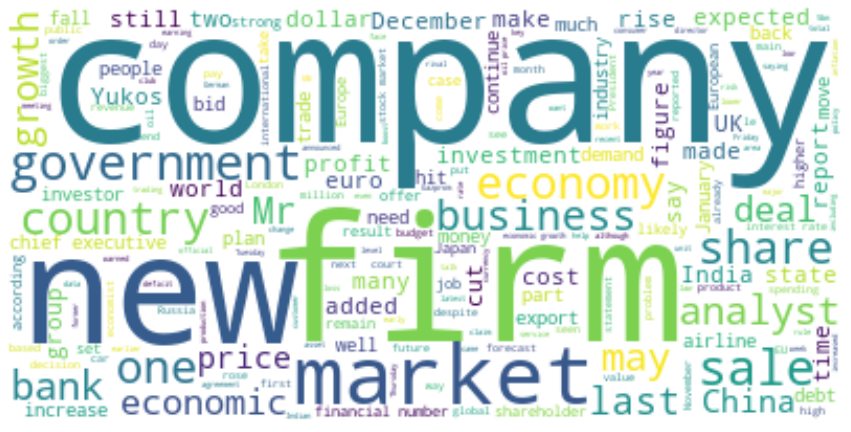

In [17]:

#plotting wordcloud
word_cloud(business_df['business'])

In [18]:
# calculating Sentiment
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
business_df['Positive'] = [sentiments.polarity_scores(i)["pos"] for i in business_df['business'] ]
business_df['Negative'] = [sentiments.polarity_scores(i)["neg"] for i in business_df['business'] ]
business_df['Neutral'] = [sentiments.polarity_scores(i)["neu"] for i in business_df['business'] ]
business_df.head()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Rajkumar_Singh\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,business,Positive,Negative,Neutral
0,Ad sale boost Time Warner profitQuarterly prof...,0.222,0.036,0.743
1,Dollar gain Greenspan speechThe dollar hit hig...,0.136,0.106,0.758
2,Yukos unit buyer face loan claimThe owner emba...,0.086,0.122,0.792
3,High fuel price hit BA profitsBritish Airways ...,0.177,0.070,0.754
4,Pernod takeover talk lift DomecqShares UK drin...,0.102,0.055,0.843


In [19]:
sentiment_score(business_df)

Neutral 🙂 


### Observation
- business new are more towards Neutral

In [20]:
#counting word in each news
business_df['word_count'] = business_df['business'].apply(count_word)

Text(0.5, 0, 'No of words')

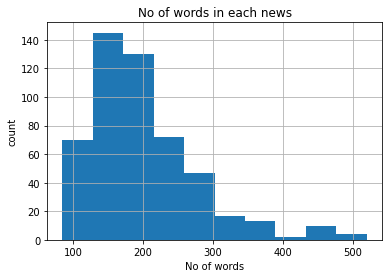

In [21]:
#plotting Distribution of  No of words 
business_df['word_count'].hist()
plt.title("No of words in each news")
plt.ylabel('count')
plt.xlabel('No of words')

### Observation
- max of new have 100 to 300 word
- 140 news have max 150 aproxx

In [22]:
%%time

#extracting category and mappibg word by category
maped_category = ner(business_df['business'])

CPU times: total: 51.3 s
Wall time: 51.4 s


In [23]:
#counting word by category
category_df = count_ner_df(maped_category)
category_df

,keyword,count
0,ORG,3941
1,CARDINAL,2559
2,DATE,2924
3,ORDINAL,426
4,PRODUCT,146
5,PERSON,1871
6,NORP,1041
7,LOC,274
8,GPE,1958
9,MONEY,156


Text(0.5, 0, 'category')

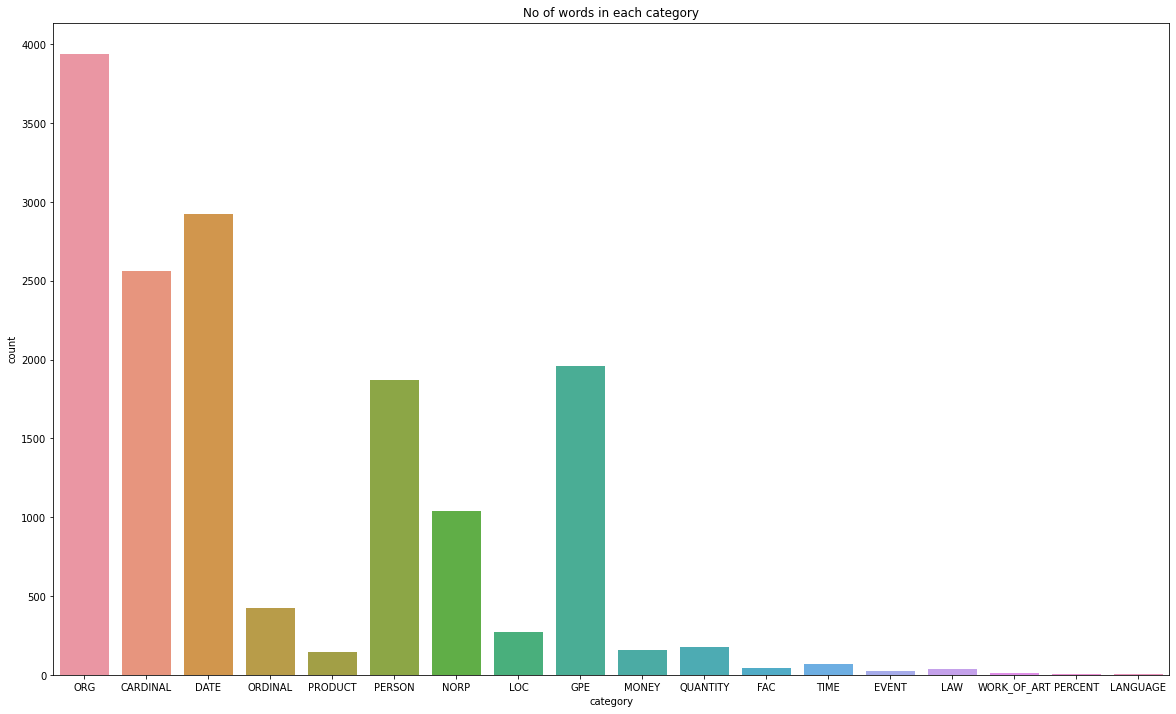

In [24]:
#ploting no. of word in each category
plt.figure(figsize=(20,12))
sns.barplot(x=category_df['keyword'],y=category_df['count'])
plt.title("No of words in each category")
plt.ylabel('count')
plt.xlabel('category')

### Observation
   - max
        - 4035 word are ORG
        - 3363 word are DATE
   - min
        - 5  word are PERCENT
        - 5  word are LANGUAGE
        


#### Top five most frequent word

In [25]:
%%time
#getting top 5 word by TF IDF
get_top_features(business_df['business'],5,1)

CPU times: total: 297 ms
Wall time: 296 ms


C:\Users\Rajkumar_Singh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['company', 'not', 'would', 'market', 'firm']

### Observation
'company', 'not', 'would', 'market', 'firm' are top five most frequent word

In [26]:
# counting 'company', 'market', 'firm'  present in each news
company_count = len(business_df[business_df["business"].str.contains('company')])
market_count = len(business_df[business_df["business"].str.contains('market')])
firm_count = len(business_df[business_df["business"].str.contains('firm')])

Text(0.5, 0, 'words')

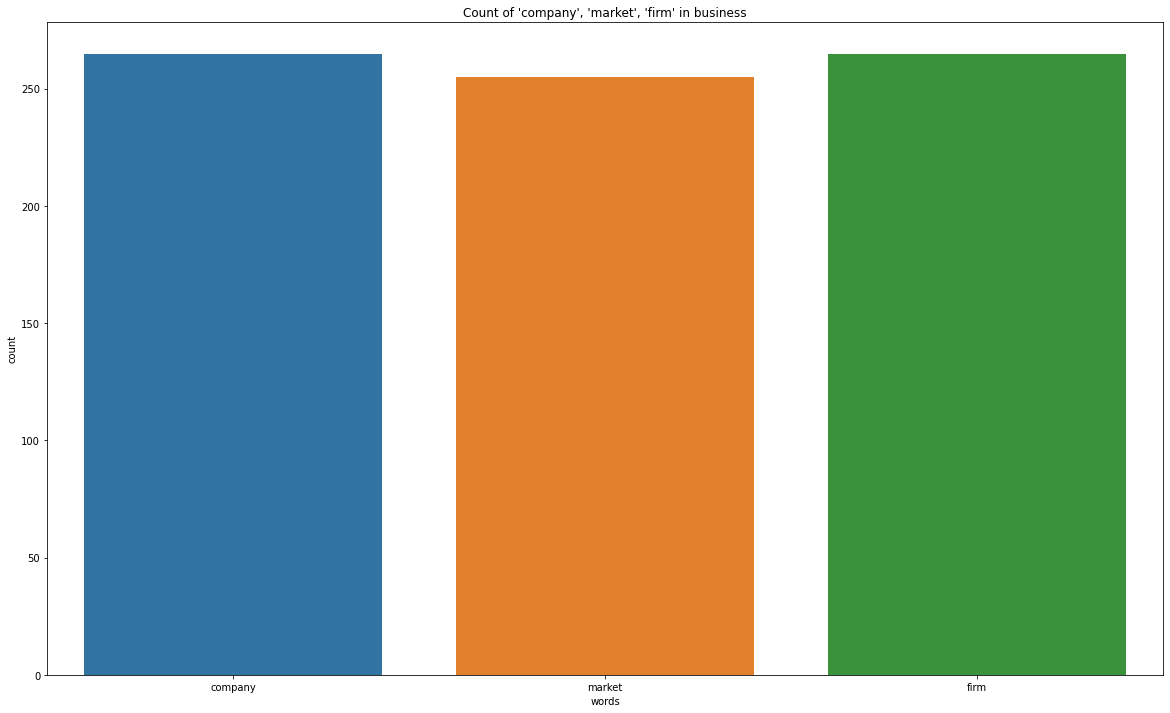

In [27]:
# ploting 'company', 'market', 'firm'  present in each news

words = ['company', 'market', 'firm']
counts = [company_count,market_count,firm_count]
plt.figure(figsize=(20,12))
sns.barplot(x=words,y=counts)
plt.title("Count of 'company', 'market', 'firm' in business")
plt.ylabel('count')
plt.xlabel('words')

### Observation
    - 'company' is present in 265 news
    - 'market' is present in 255 news
    - 'firm' is present in 265 news
    

In [28]:
#making new feature of counting 'company', 'market', 'firm' count in each news
business_df['company_count'] = business_df['business'].str.count("company")
business_df['market_count'] = business_df['business'].str.count("market")
business_df['firm_count'] = business_df['business'].str.count("firm")

Text(0.5, 0, 'count of company word in news')

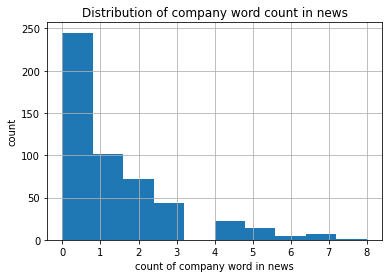

In [29]:
#ploting Distribution of company word count
business_df['company_count'].hist()
plt.title('Distribution of company word count in news')
plt.ylabel('count')
plt.xlabel('count of company word in news')

### Observation
- most of the new have only 1 or 2 count of company 
- max count is 8 in some of the news

Text(0.5, 0, 'count of market word in news')

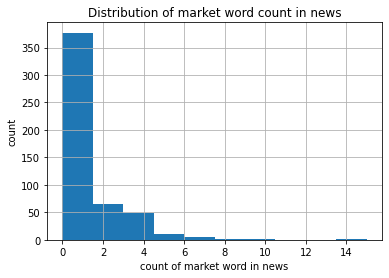

In [30]:
#ploting Distribution of market word count
business_df['market_count'].hist()
plt.title('Distribution of market word count in news')
plt.ylabel('count')
plt.xlabel('count of market word in news')

### Observation
- most of the new have only 2 or 5 count of company 
- max count is 14-15 in some of the news

Text(0.5, 0, 'count of firm word in news')

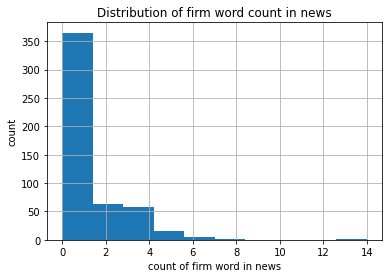

In [31]:
#ploting Distribution of firm word count

business_df['firm_count'].hist()
plt.title('Distribution of firm word count in news')
plt.ylabel('count')
plt.xlabel('count of firm word in news')

### Observation
- most of the new have only 2 or 4 count of company 
- max count is 14 in some of the news

In [32]:
%%time
#top 5 bigram of politics
top5_business_bigram = get_top_features(business_df['business'],5,2)
top5_business_bigram

CPU times: total: 1.19 s
Wall time: 1.18 s


C:\Users\Rajkumar_Singh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['chief executive',
 'interest rate',
 'stock market',
 'economic growth',
 'new york']

In [33]:
#5 sentenct related to chief executive of business
for i in five_word_contains(business_df,'business','chief executive'):
    print(i)

flexibility chairman chief executive Richard Parsons
Eddington BA chief executive result respectable
newly appointed chief executive Takashi Nishioka
Ryanair deputy chief executive Michael Cawley
Key position chief executive chief technology


### Obesrvation
- we can see that when chief executive is appering in sentenct it is to mention the appointment of the new chief executive or someting related to presonlity of  chief executive. 

In [34]:
#5 sentenct related to chief interest rate of business
for i in five_word_contains(business_df,'business','interest rate'):
    print(i)

February boost interest rate quarter point
relatively low interest rate environment economy
strong growth interest rate remain low
least helped interest rate lowest level
MPC held interest rate high given


### Obesrvation
- interest rate are high in February but low relatively environment economy
- almost in every news interest rate low

In [35]:
#5 sentenct related to chief stock market of business

for i in five_word_contains(business_df,'business','stock market'):
    print(i)

regulation imposed stock market watchdog Securities
company Japanese stock market rule no
quarter Tokyo stock market fell figure
could listed stock market part overhaul
UK bank stock market valuation report


### Obesrvation
- stock market have highly secure
- maily talking about stok market of japan and UK

In [36]:
#5 sentenct related to chief economic growth of business

for i in five_word_contains(business_df,'business','economic growth'):
    print(i)

hamper country economic growth forecast around
shortfall annual economic growth good quarterly
upward revision economic growth fourth quarter
hit global economic growth although world
distribution subsidy economic growth poverty could


### Obesrvation
- economic growth may  hamper in long run while in the forth quarter there is a upword revision while the anual growth is good quarterly. 

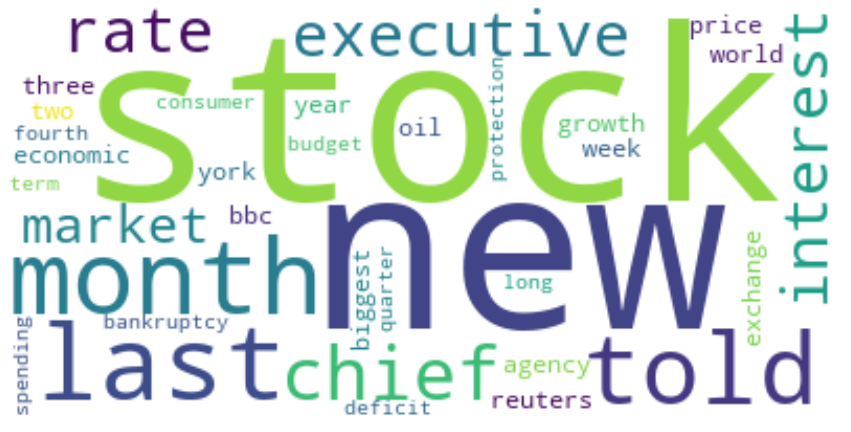

In [37]:
#word cloud of top 20 bigrams
word_cloud(get_top_features(business_df['business'],20,2))

# Summary
- News are in 100 to 300 words
- word are mostly of organisation and date category
- most common words are market firm and company
- top 5 word are occur 1 to 4 time in each news
- top 5 bigrams are 'chief executive','interest rate','stock market','economic growth','new york'
- bigrams are saying about
 - appointment of the new chief executive and presonlity of  chief executive. 
 - almost in every news interest rate low
 - about stok market of japan and UK
 - economic growth may  hamper in long run while

# Entertainment news analysis

## Wordcloud


Now let’s have a look at the wordcloud of the entertainment news, which will show the most frequently used words in the entertainment news.

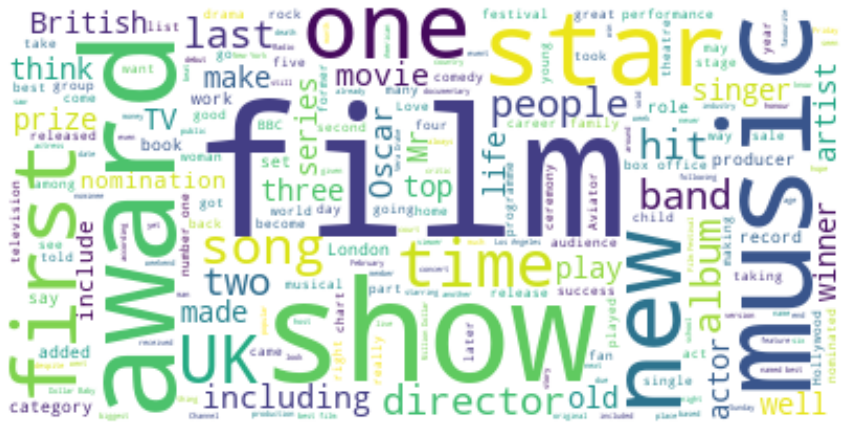

In [38]:
#plotting wordcloud
word_cloud(entertainment_df['entertainment'])

In [39]:
# calculating Sentiment
sentiments = SentimentIntensityAnalyzer()
entertainment_df['Positive'] = [sentiments.polarity_scores(i)["pos"] for i in entertainment_df['entertainment'] ]
entertainment_df['Negative'] = [sentiments.polarity_scores(i)["neg"] for i in entertainment_df['entertainment'] ]
entertainment_df['Neutral'] = [sentiments.polarity_scores(i)["neu"] for i in entertainment_df['entertainment'] ]
entertainment_df.head()

,entertainment,Positive,Negative,Neutral
0,Gallery unveils interactive treeA Christmas tr...,0.090,0.027,0.883
1,Jarre join fairytale celebrationFrench musicia...,0.176,0.030,0.794
2,Musical treatment Capra filmThe classic film W...,0.231,0.029,0.740
3,Richard Judy choose top booksThe 10 author sho...,0.363,0.042,0.595
4,Poppins musical get flying startThe stage adap...,0.100,0.040,0.860


In [40]:
sentiment_score(entertainment_df)

Neutral 🙂 


### Observation
- entertainment news are more towards Neutral

In [41]:

#counting word in each news
entertainment_df['word_count'] = entertainment_df['entertainment'].apply(count_word)

Text(0.5, 0, 'No of words')

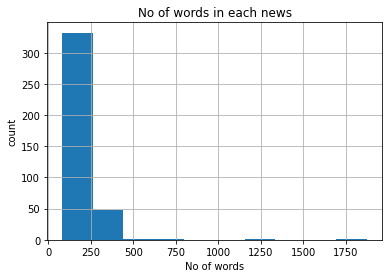

In [42]:
#plotting Distribution of  No of words 
entertainment_df['word_count'].hist()
plt.title("No of words in each news")
plt.ylabel('count')
plt.xlabel('No of words')

### Observation
- max of new have 50 to 400 word
- some news are also of 750, 1250 and 1750

In [43]:
%%time
#extracting category and mappibg word by category
maped_category = ner(entertainment_df['entertainment'])

CPU times: total: 37.3 s
Wall time: 37.5 s


In [44]:
#counting word by category
category_df = count_ner_df(maped_category)
category_df

,keyword,count
0,ORG,2260
1,PERSON,3876
2,ORDINAL,408
3,DATE,1646
4,GPE,1064
5,WORK_OF_ART,159
6,NORP,642
7,LOC,128
8,CARDINAL,1601
9,TIME,136


Text(0.5, 0, 'category')

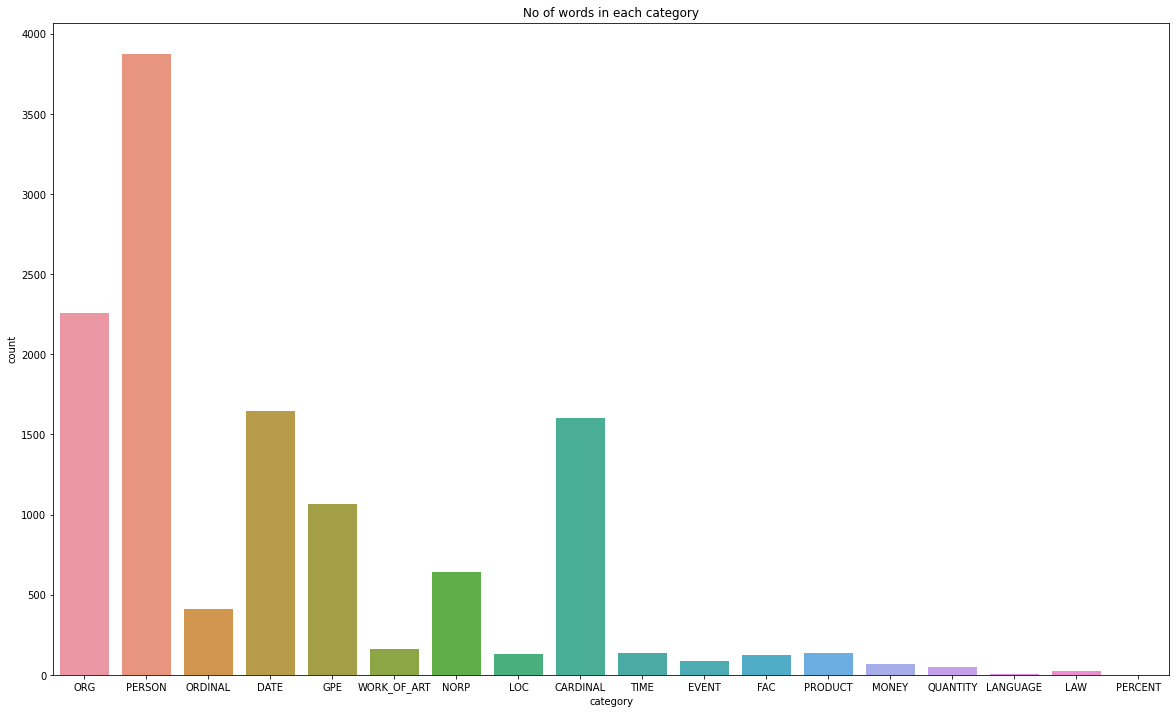

In [45]:
#ploting no. of word in each category
plt.figure(figsize=(20,12))
sns.barplot(x=category_df['keyword'],y=category_df['count'])
plt.title("No of words in each category")
plt.ylabel('count')
plt.xlabel('category')

### Observation
   - max
        - 3876 word are ORG
        - 2260 word are PERSON
   - min
        - 2  word are PERCENT
        - 5  word are LANGUAGE
        

#### Top five most frequent word

In [46]:
%%time
#getting top 5 word by TF IDF
get_top_features(entertainment_df['entertainment'],5,1)

CPU times: total: 266 ms
Wall time: 274 ms


C:\Users\Rajkumar_Singh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['one', 'film', 'star', 'new', 'not']


### Observation
'one', 'film', 'star', 'new', 'not' are top five most frequent word are top five most frequent word

In [47]:
# 'one', 'film', 'star', 'new', 'not'  present in each news
film_count = len(entertainment_df[entertainment_df["entertainment"].str.contains('film')])
star_count = len(entertainment_df[entertainment_df["entertainment"].str.contains('star')])
new_count = len(entertainment_df[entertainment_df["entertainment"].str.contains('new')])


Text(0.5, 0, 'words')

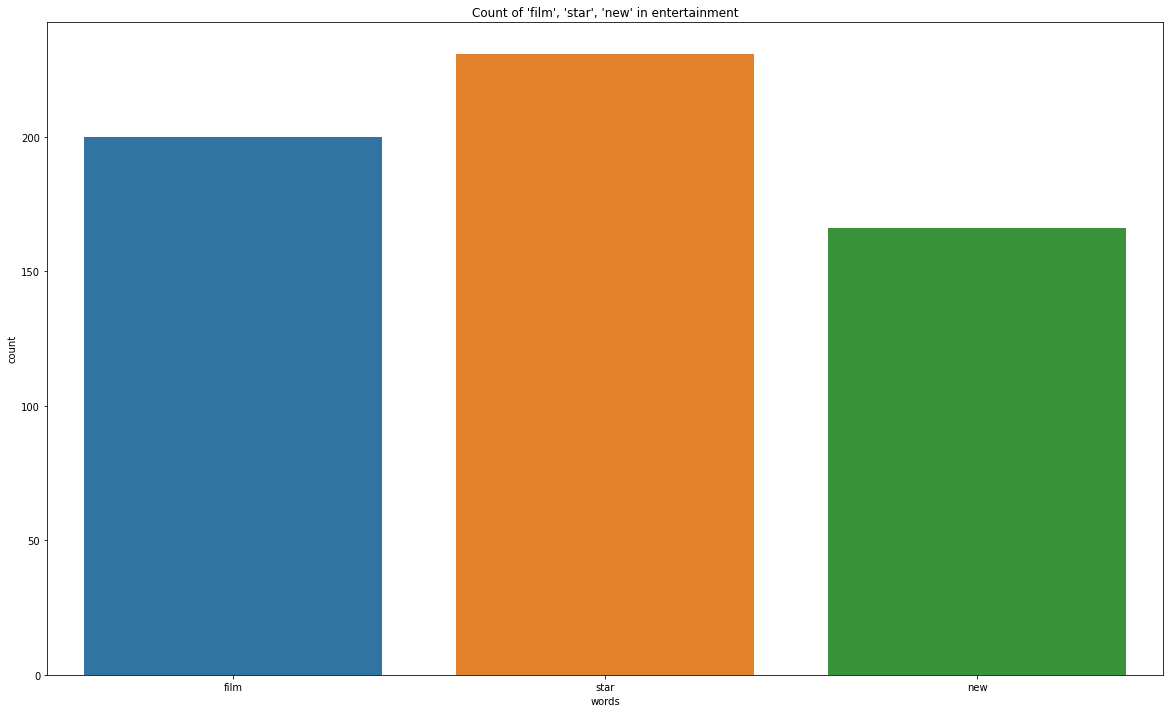

In [48]:
# ploting 'company', 'market', 'firm'  present in each news

words = ['film', 'star', 'new']
counts = [film_count,star_count,new_count]
plt.figure(figsize=(20,12))
sns.barplot(x=words,y=counts)
plt.title("Count of 'film', 'star', 'new' in entertainment")
plt.ylabel('count')
plt.xlabel('words')

### Observation
    - 'film' is present in 200 news
    - 'star' is present in 231 news
    - 'new' is present in 166 news

In [49]:
#making new feature of counting 'film', 'star', 'new' count in each news
entertainment_df['film_count'] = entertainment_df['entertainment'].str.count("film")
entertainment_df['star_count'] = entertainment_df['entertainment'].str.count("star")
entertainment_df['new_count'] = entertainment_df['entertainment'].str.count("new")

Text(0.5, 0, 'count of film word in news')

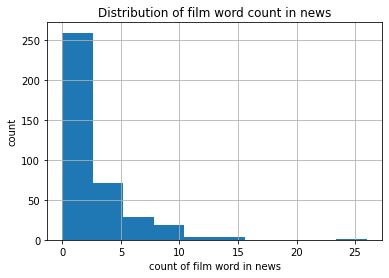

In [50]:
#ploting Distribution of film word count
entertainment_df['film_count'].hist()
plt.title('Distribution of film word count in news')
plt.ylabel('count')
plt.xlabel('count of film word in news')

### Observation
- most of the new have only 1 or 10 count of company 
- max count is 25 in some of the news

Text(0.5, 0, 'count of star word in news')

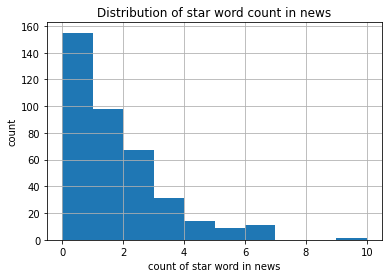

In [51]:
#ploting Distribution of star word count

entertainment_df['star_count'].hist()
plt.title('Distribution of star word count in news')
plt.ylabel('count')
plt.xlabel('count of star word in news')

### Observation
- most of the new have only 1 or 4 count of company 
- max count is 10 in some of the news

Text(0.5, 0, 'count of new word in news')

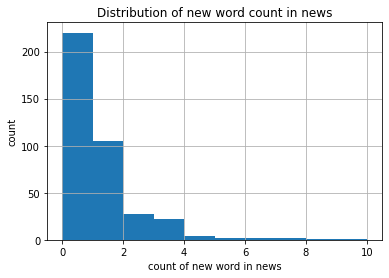

In [52]:
#ploting Distribution of new word count
entertainment_df['new_count'].hist()
plt.title('Distribution of new word count in news')
plt.ylabel('count')
plt.xlabel('count of new word in news')

### Observation
- most of the new have only 1 or 4 count of company 
- max count is 6,8,10 in some of the news

In [53]:
%%time
#top 5 bigram of entertainment
top5_entertainment_bigram = get_top_features(entertainment_df['entertainment'],5,2)
top5_entertainment_bigram

CPU times: total: 656 ms
Wall time: 654 ms


C:\Users\Rajkumar_Singh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['los angeles', 'new york', 'box office', 'number one', 'best film']

In [54]:
#5 sentenct related to box office of entertainment

for i in five_word_contains(entertainment_df,'entertainment','box office'):
    print(i)

international attention box office glory brother
m m box office alone cast
Japan cinemasJapan box office received boost
film lead box officeFilm star
perform strongly box office According lawsuit


### Observation
- that movies are getting a huge crowd in the box offfice and genrally is boxoffice occur we see someting being talk about film star or movie.

In [55]:
#5 sentenct related to number one of entertainment

for i in five_word_contains(entertainment_df,'entertainment','number one'):
    print(i)

already hit number one Hot book
shot straight number one spot taking
Esquive France number one film box
release film number one selling DVD
gone straight number one box office


### Observation
-  Hot book,  spot taking are no. one
- Esquive France , gone straight did good in box office

In [56]:
#5 sentenct related to best film of entertainment

for i in five_word_contains(entertainment_df,'entertainment','best film'):
    print(i)

category including best film best actor
abortionist named best film Staunton played
Hundreds vie best film OscarA total
nomination including best film Eternal Sunshine
producer win best film Oscar due


### Observation
- we can see that producer win Oscar for best film  
- Hundreds of movie are chosen for best film in Oscar

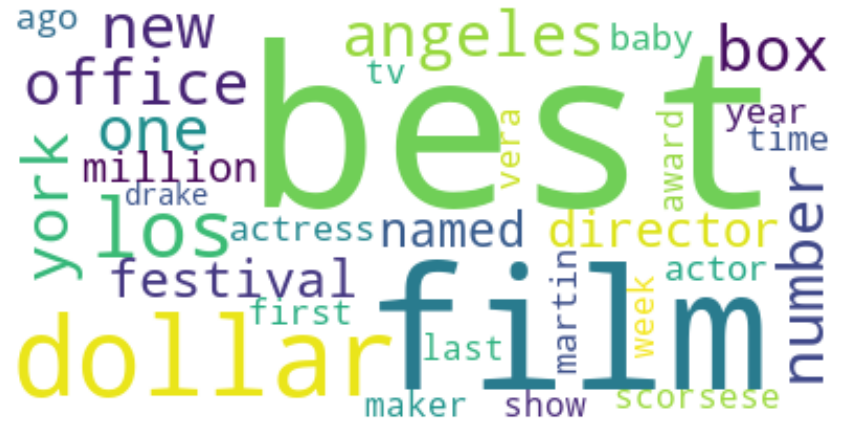

In [57]:
#word cloud of top 20 bigrams
word_cloud(get_top_features(entertainment_df['entertainment'],20,2))

# Summary
- News are in 50 to 400 words
- word are mostly of organisation and person category
- most common words are  film and star
- top 5 word are occur 1 to 4 time in each news
- top 5 bigrams are 'los angeles', 'new york', 'box office', 'number one', 'best film'
- bigrams are saying about
     - movies are getting a huge crowd in the box offfice 
     - Esquive France , gone straight did good in box office
     - producer win Oscar for best film  


# Politics news analysis

## Wordcloud


Now let’s have a look at the wordcloud of the Politics news, which will show the most frequently used words in the Politics news.

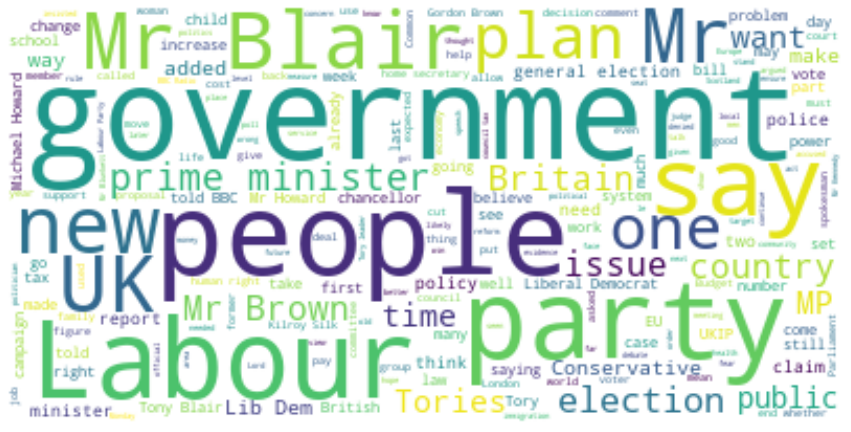

In [58]:
#plotting wordcloud
word_cloud(politics_df['politics'])

In [59]:
# calculating Sentiment
sentiments = SentimentIntensityAnalyzer()
politics_df['Positive'] = [sentiments.polarity_scores(i)["pos"] for i in politics_df['politics'] ]
politics_df['Negative'] = [sentiments.polarity_scores(i)["neg"] for i in politics_df['politics'] ]
politics_df['Neutral'] = [sentiments.polarity_scores(i)["neu"] for i in politics_df['politics'] ]
politics_df.head()

,politics,Positive,Negative,Neutral
0,Labour plan maternity pay riseMaternity pay ne...,0.116,0.101,0.783
1,Watchdog probe e mail deletionsThe information...,0.176,0.139,0.685
2,Hewitt decries career sexism Plans extend paid...,0.121,0.063,0.816
3,Labour chooses ManchesterThe Labour Party hold...,0.186,0.061,0.753
4,Brown ally reject Budget spreeChancellor Gordo...,0.153,0.077,0.770


In [60]:
sentiment_score(business_df)

Neutral 🙂 


### Observation
- politics news are more towards Neutral

In [61]:
#counting word in each news
politics_df['word_count'] = politics_df['politics'].apply(count_word)

Text(0.5, 0, 'No of words')

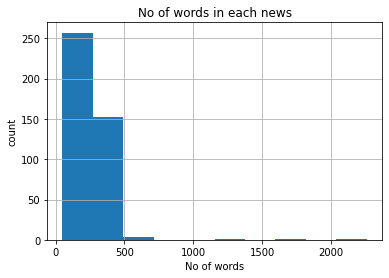

In [62]:
#plotting Distribution of  No of words 
politics_df['word_count'].hist()
plt.title("No of words in each news")
plt.ylabel('count')
plt.xlabel('No of words')

### Observation
- max of new have 150 to 500 word
- 250 news have max 250 aproxx

In [63]:
%%time
#extracting category and mappibg word by category
maped_category = ner(politics_df['politics'])

CPU times: total: 49.4 s
Wall time: 49.5 s


In [64]:
#counting word by category
category_df = count_ner_df(maped_category)
category_df

,keyword,count
0,CARDINAL,1333
1,ORG,2921
2,PERSON,3409
3,DATE,1614
4,NORP,1145
5,PRODUCT,79
6,ORDINAL,336
7,GPE,1387
8,MONEY,29
9,EVENT,38


Text(0.5, 0, 'category')

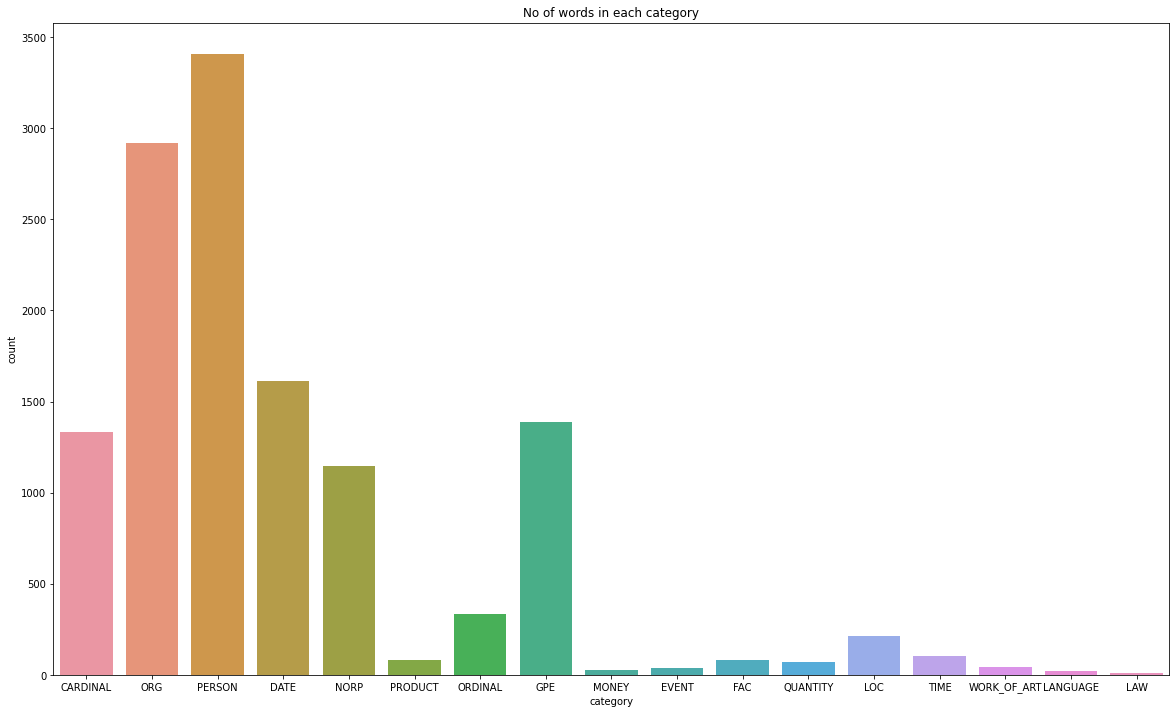

In [65]:
#ploting no. of word in each category
plt.figure(figsize=(20,12))
sns.barplot(x=category_df['keyword'],y=category_df['count'])
plt.title("No of words in each category")
plt.ylabel('count')
plt.xlabel('category')


### Observation
   - max
        - 3409 word are PERSON
        - 1383 word are GPE
   - min
        - 10  word are LAW
        - 29  word are MONEY
        


#### Top five most frequent word

In [66]:
%%time
#getting top 5 word by TF IDF
get_top_features(politics_df['politics'],5,1)


CPU times: total: 422 ms
Wall time: 398 ms


C:\Users\Rajkumar_Singh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['would', 'not', 'mr', 'government', 'minister']

### Observation
'would', 'not', 'mr', 'government', 'minister' are top five most frequent word

In [67]:
# 'government', 'minister'   present in each news
government_count = len(politics_df[politics_df["politics"].str.contains('government')])
minister_count = len(politics_df[politics_df["politics"].str.contains('minister')])


Text(0.5, 0, 'words')

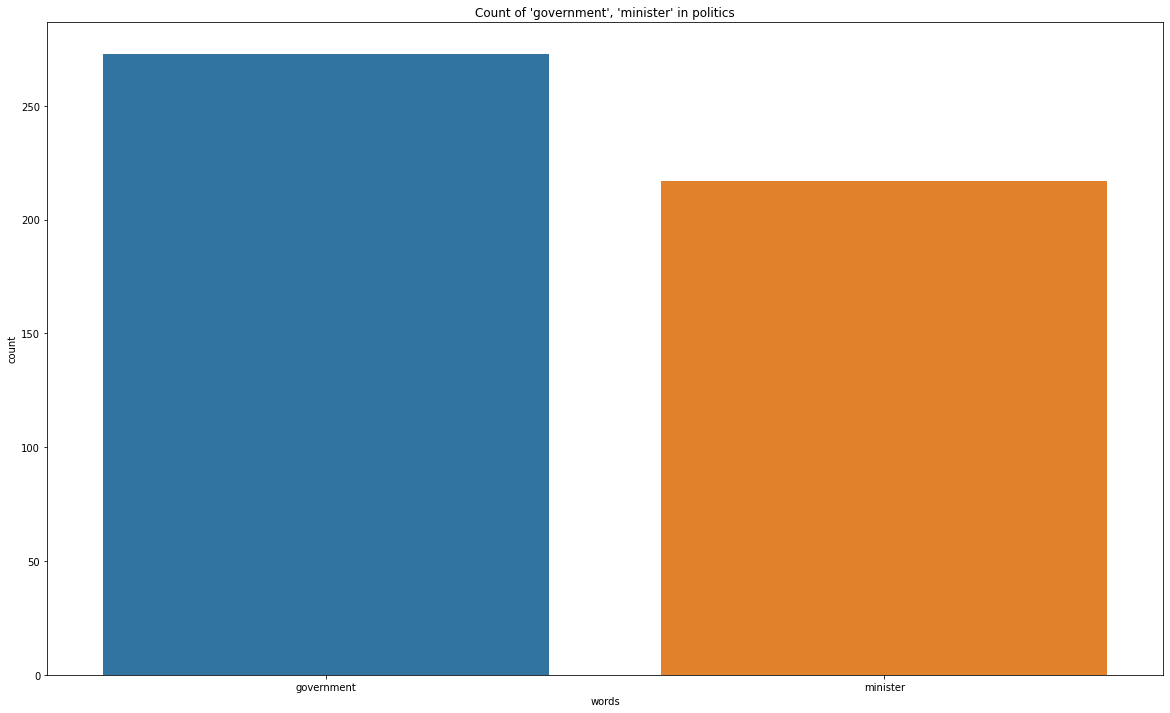

In [68]:
# ploting 'government', 'minister'  present in each news

words = ['government', 'minister']
counts = [government_count,minister_count]
plt.figure(figsize=(20,12))
sns.barplot(x=words,y=counts)
plt.title("Count of 'government', 'minister' in politics")
plt.ylabel('count')
plt.xlabel('words')

### Observation
    - 'government' is present in 273 news
    - 'minister' is present in 217 news
    

In [69]:
#making new feature of counting 'government', 'minister' count in each news
politics_df['government_count'] = politics_df['politics'].str.count("government")
politics_df['minister_count'] = politics_df['politics'].str.count("minister")

Text(0.5, 0, 'count of government word in news')

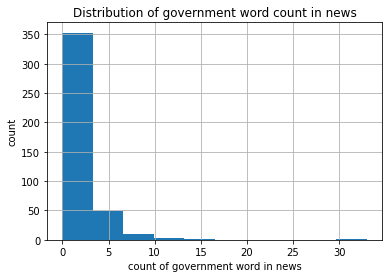

In [70]:
#ploting Distribution of government word count
politics_df['government_count'].hist()
plt.title('Distribution of government word count in news')
plt.ylabel('count')
plt.xlabel('count of government word in news')

### Observation
- most of the new have only 1 or 3 count of company 
- max count is 15,30 in some of the news

Text(0.5, 0, 'count of minister word in news')

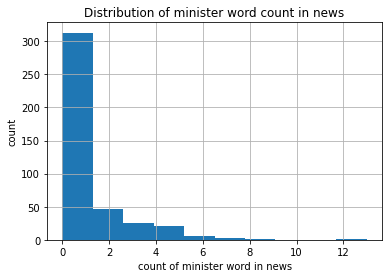

In [71]:
#ploting Distribution of minister word count
politics_df['minister_count'].hist()
plt.title('Distribution of minister word count in news')
plt.ylabel('count')
plt.xlabel('count of minister word in news')

### Observation
- most of the new have only 1 or 2 count of company 
- max count is 12,13 in some of the news

In [72]:
#top 5 bigram of politics
top5_politics_bigram = get_top_features(politics_df['politics'],5,2)
top5_politics_bigram

C:\Users\Rajkumar_Singh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['prime minister', 'tony blair', 'general election', 'told bbc', 'mr blair']

In [73]:
#5 sentenct related to prime minister of politics
for i in five_word_contains(business_df,'business','prime minister'):
    print(i)

action planItalian prime minister Silvio Berlusconi
existent worker prime minister Ephraim Inoni
former Dutch prime minister Wim Kok
assassinated former prime minister Rafik Hariri
agreement Tuesday prime minister Bulgaria Albania


### Observation
- we can see that in this news they are talking about prime minister  Silvio Berlusconi,Ephraim Inoni,Wim Kok and Rafik Hariri 
- they are talking about  prime minister of talking about, Dutch 

In [74]:
#5 sentenct related to general election of politics
for i in five_word_contains(politics_df,'politics','general election'):
    print(i)

woman MPs general election greater number
tax next general election Mr Letwin
hope next general election Charles Kennedy
home secretary general election Mr Blunkett
lead next general election widely expected


### Observation
- woman are also takeing part in election
- talking about some leader Mr Letwin, Charles Kennedy

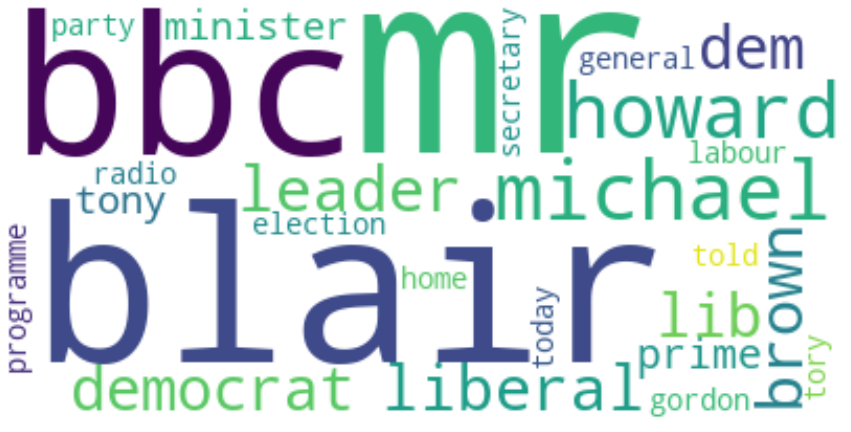

CPU times: total: 1.86 s
Wall time: 1.9 s


In [75]:
%%time
#word cloud of top 20 bigrams
word_cloud(get_top_features(politics_df['politics'],20,2))

# Summary
- News are in 150 to 500 words
- word are mostly of GPR and person category
- most common words are  'government', 'minister'
- top 5 word are occur 1 to 3 time in each news
- top 5 bigrams are 'prime minister', 'tony blair', 'general election', 'told bbc', 'mr blair'
- bigrams are saying about
     - talking about  prime minister of talking about, Dutch 
     - woman are also takeing part in election



# Sport news analysis

## Wordcloud


Now let’s have a look at the wordcloud of the Sport news, which will show the most frequently used words in the Sport news.

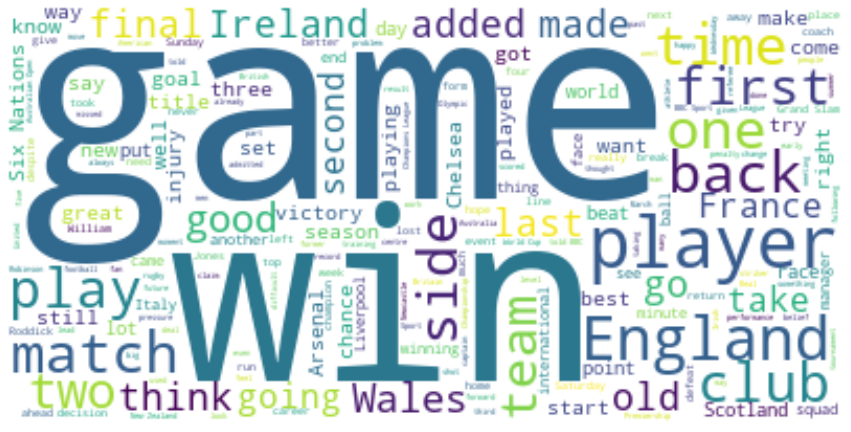

In [76]:
#plotting wordcloud
word_cloud(sport_df['sport'])

In [77]:
# calculating Sentiment

sentiments = SentimentIntensityAnalyzer()
sport_df['Positive'] = [sentiments.polarity_scores(i)["pos"] for i in sport_df['sport'] ]
sport_df['Negative'] = [sentiments.polarity_scores(i)["neg"] for i in sport_df['sport'] ]
sport_df['Neutral'] = [sentiments.polarity_scores(i)["neu"] for i in sport_df['sport'] ]
sport_df.head()

,sport,Positive,Negative,Neutral
0,Claxton hunting first major medalBritish hurdl...,0.235,0.036,0.729
1,Sullivan could run WorldsSonia Sullivan indica...,0.124,0.000,0.876
2,Greene set sight world titleMaurice Greene aim...,0.104,0.111,0.785
3,IAAF launch fight drugsThe IAAF athletics worl...,0.101,0.086,0.814
4,Dibaba break 5 000m world recordEthiopia Tirun...,0.154,0.057,0.789


In [78]:
sentiment_score(business_df)

Neutral 🙂 


### Observation
- sport news are more towards Neutral

In [79]:
#counting word in each news
sport_df['word_count'] = sport_df['sport'].apply(count_word)

Text(0.5, 0, 'No of words')

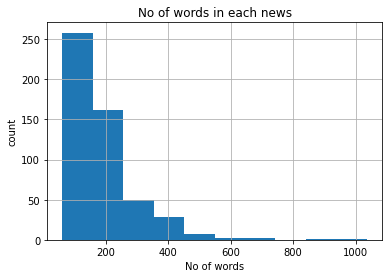

In [80]:
#plotting Distribution of  No of words 
sport_df['word_count'].hist()
plt.title("No of words in each news")
plt.ylabel('count')
plt.xlabel('No of words')

### Observation
- max of new have 100 to 350 word
- 250 news have max 100 aproxx
- some of new are of 600,700 and 1000 word

In [81]:
%%time
#extracting category and mappibg word by category
maped_category = ner(sport_df['sport'])

CPU times: total: 47 s
Wall time: 47.4 s


In [82]:
#counting word by category
category_df = count_ner_df(maped_category)
category_df

,keyword,count
0,ORG,2518
1,ORDINAL,864
2,NORP,988
3,PERSON,5432
4,DATE,1860
5,GPE,2390
6,CARDINAL,2046
7,TIME,275
8,EVENT,263
9,FAC,168


Text(0.5, 0, 'category')

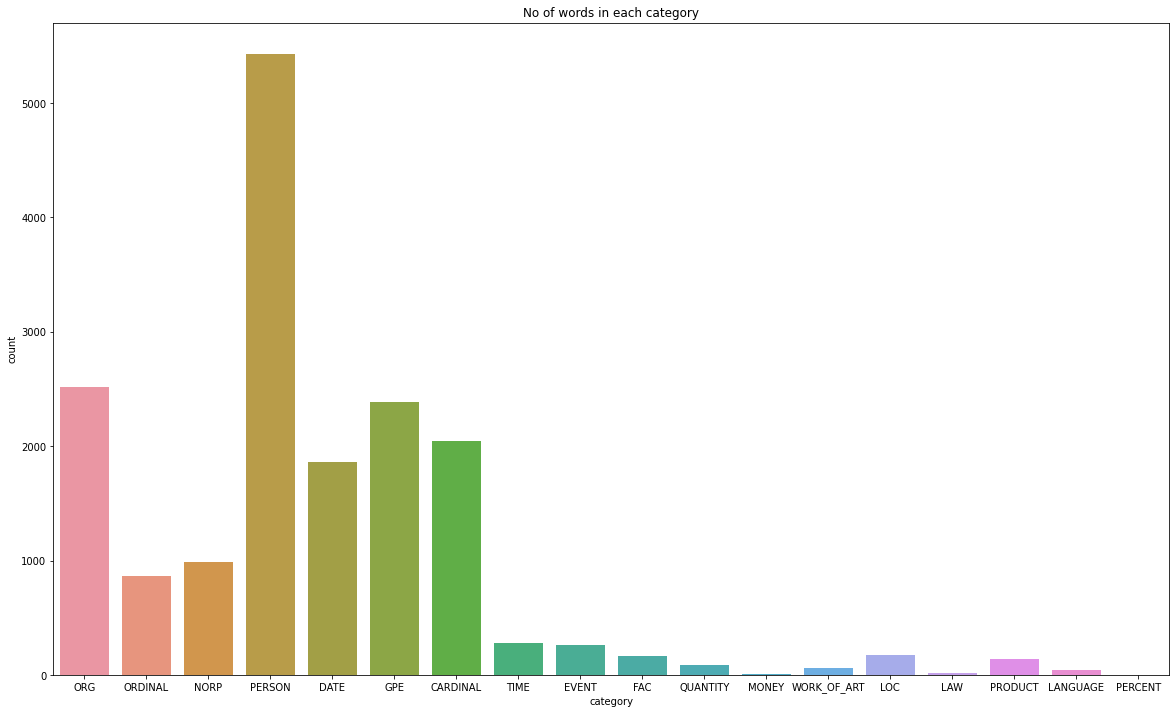

In [83]:
#ploting no. of word in each category
plt.figure(figsize=(20,12))
sns.barplot(x=category_df['keyword'],y=category_df['count'])
plt.title("No of words in each category")
plt.ylabel('count')
plt.xlabel('category')

### Observation
   - max
        - 5432 word are CARDINAL
        - 2518 word are ORG
   - min
        - 1  word are PERCENT
        - 8  word are MONEY

#### Top five most frequent word

In [84]:
%%time
#getting top 5 word by TF IDF
get_top_features(sport_df['sport'],5,1)

CPU times: total: 312 ms
Wall time: 292 ms


C:\Users\Rajkumar_Singh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['not', 'time', 'game', 'win', 'last']

In [85]:
# counting 'not', 'time', 'game', 'win', 'last'  present in each news
time_count = len(sport_df[sport_df["sport"].str.contains('time')])
game_count = len(sport_df[sport_df["sport"].str.contains('game')])
win_count = len(sport_df[sport_df["sport"].str.contains('win')])
last_count = len(sport_df[sport_df["sport"].str.contains('last')])


Text(0.5, 0, 'words')

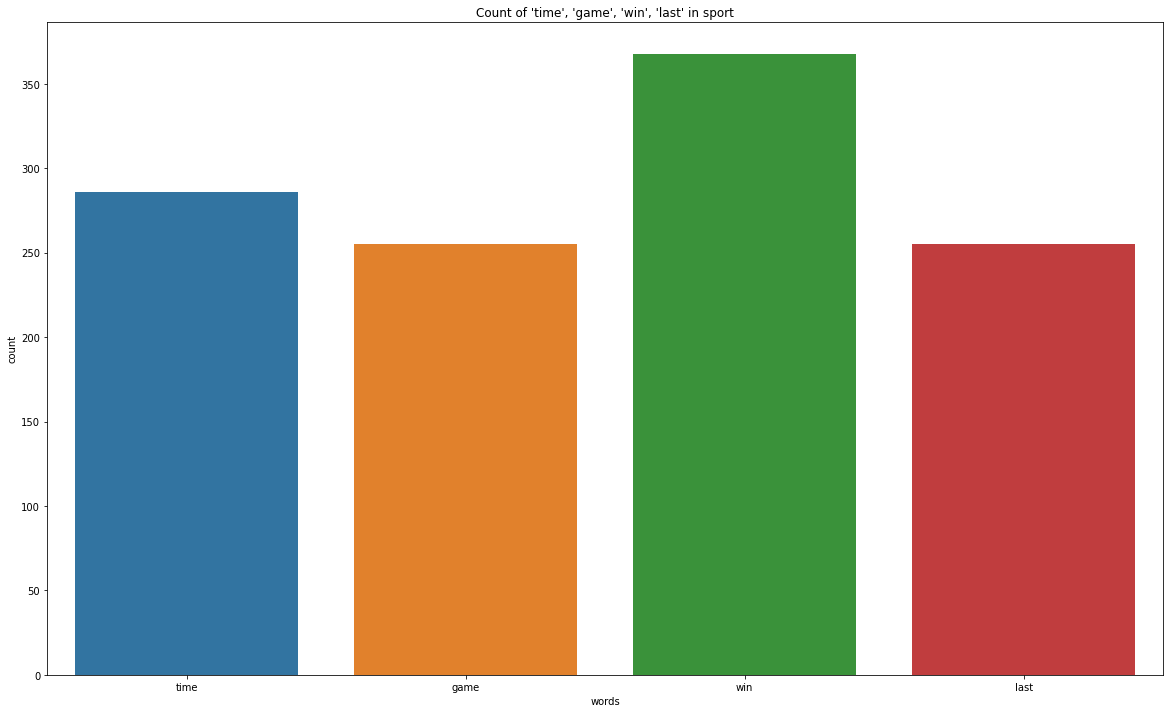

In [86]:
# ploting  'time', 'game', 'win', 'last'  present in each news

words = [ 'time', 'game', 'win', 'last']
counts = [time_count,market_count,win_count,last_count]
plt.figure(figsize=(20,12))
sns.barplot(x=words,y=counts)
plt.title("Count of 'time', 'game', 'win', 'last' in sport")
plt.ylabel('count')
plt.xlabel('words')

In [87]:
print(time_count,
game_count,
win_count ,
last_count)

286 260 368 255


### Observation
    - 'time' is present in 286  news
    - 'game' is present in 260  news
    - 'win' is present in 368  news
    - 'last' is present in 255 news
    

In [88]:
#making new feature of counting 'time', 'game', 'win', 'last' count in each news
sport_df['time_count'] = sport_df['sport'].str.count("time")
sport_df['game_count'] = sport_df['sport'].str.count("game")
sport_df['win_count'] = sport_df['sport'].str.count("win")
sport_df['last_count'] = sport_df['sport'].str.count("last")


Text(0.5, 0, 'count of time word in news')

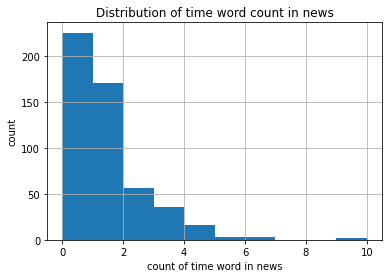

In [89]:
#ploting Distribution of time word count
sport_df['time_count'].hist()
plt.title('Distribution of time word count in news')
plt.ylabel('count')
plt.xlabel('count of time word in news')

### Observation
- most of the new have only 1 or 2 count of company 
- max count is 10 in some of the news

Text(0.5, 0, 'count of game word in news')

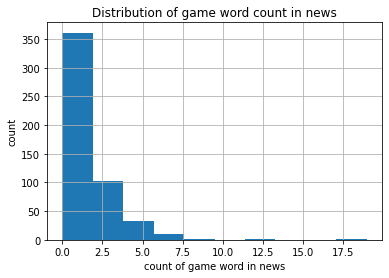

In [90]:
#ploting Distribution of game word count
sport_df['game_count'].hist()
plt.title('Distribution of game word count in news')
plt.ylabel('count')
plt.xlabel('count of game word in news')

### Observation
- most of the new have only 1 or 2 count of company 
- max count is 17,12 in some of the news

Text(0.5, 0, 'count of win word in news')

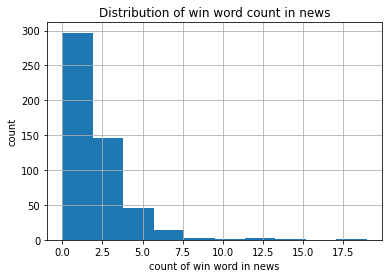

In [91]:
#ploting Distribution of win word count
sport_df['win_count'].hist()
plt.title('Distribution of win word count in news')
plt.ylabel('count')
plt.xlabel('count of win word in news')

### Observation
- most of the new have only 1 or 2 count of company 
- max count is 17,12 in some of the news

Text(0.5, 0, 'count of last word in news')

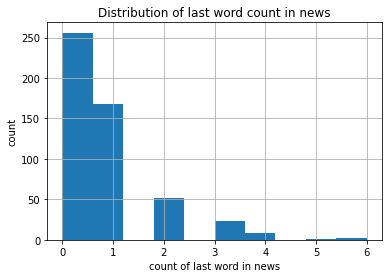

In [92]:
#ploting Distribution of win word count
sport_df['last_count'].hist()
plt.title('Distribution of last word count in news')
plt.ylabel('count')
plt.xlabel('count of last word in news')

### Observation
- most of the new have only 1  count of company 
- max count is 5,6 in some of the news

In [93]:
%%time
#top 5 bigram of sport
top5_sport_bigram = get_top_features(sport_df['sport'],5,2)
top5_sport_bigram

CPU times: total: 938 ms
Wall time: 914 ms


C:\Users\Rajkumar_Singh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['six nations', 'told bbc', 'bbc sport', 'grand slam', 'world cup']

In [94]:
#5 sentenct related to six nations of sport
for i in five_word_contains(sport_df,'sport','grand slam'):
    print(i)

City marathon grand slam win Chicago
seven eight grand slam gone go
third round grand slam tennis event
organiser first grand slam begin January
organiser first grand slam begin January


### Observation
- grand slam start in January
- We can say that grand slam is a name of tennis event
- Chicago has win grand slam 

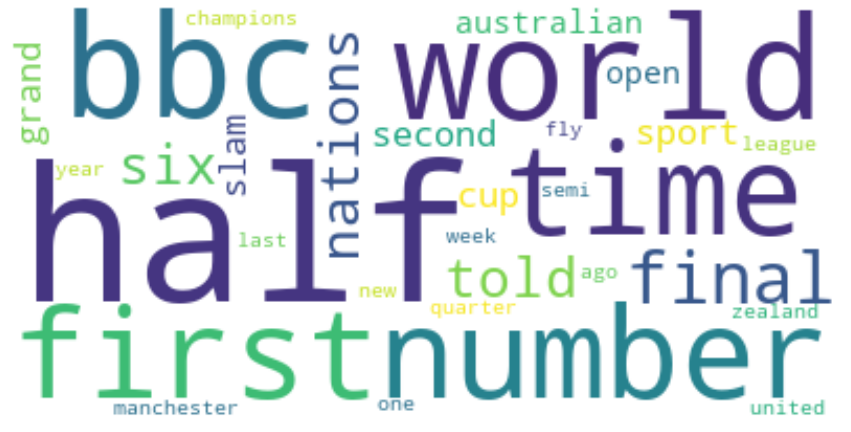

In [95]:
#word cloud of top 20 bigrams
word_cloud(get_top_features(sport_df['sport'],20,2))

# Summary
- News are in 100 to 350 words
- word are mostly of organisation and CARDINAL category
- most common words are  'time', 'game', 'win', 'last' 
- top 5 word are occur 1 to 4 time in each news
- top 5 bigrams are 'six nations', 'told bbc', 'bbc sport', 'grand slam', 'world cup'
- bigrams are saying about
     - grand slam start in January
     -  grand slam is a name of tennis event



# Tech news analysis

## Wordcloud


Now let’s have a look at the wordcloud of the Tech news, which will show the most frequently used words in the Tech news.

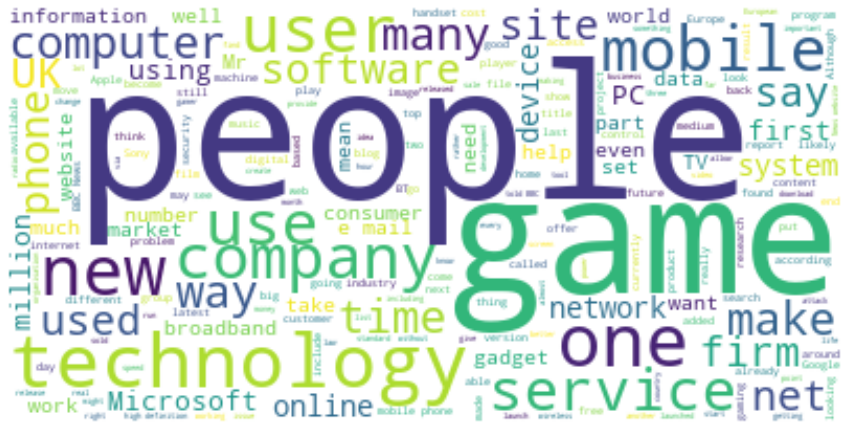

In [96]:
#plotting wordcloud
word_cloud(tech_df['tech'])

In [97]:
# calculating Sentiment

sentiments = SentimentIntensityAnalyzer()
tech_df['Positive'] = [sentiments.polarity_scores(i)["pos"] for i in tech_df['tech'] ]
tech_df['Negative'] = [sentiments.polarity_scores(i)["neg"] for i in tech_df['tech'] ]
tech_df['Neutral'] = [sentiments.polarity_scores(i)["neu"] for i in tech_df['tech'] ]
tech_df.head()

,tech,Positive,Negative,Neutral
0,Ink help drive democracy AsiaThe Kyrgyz Republ...,0.120,0.052,0.828
1,China net cafe culture crackdownChinese author...,0.067,0.131,0.801
2,Microsoft seeking spyware trojanMicrosoft inve...,0.093,0.168,0.739
3,Digital guru float sub 100 PCNicholas Negropon...,0.089,0.047,0.865
4,Technology get creative bugThe hi tech art wor...,0.247,0.024,0.729


In [98]:
sentiment_score(tech_df)

Neutral 🙂 


### Observation
- tech news are more towards Neutral

In [99]:
#counting word in each news
tech_df['word_count'] = tech_df['tech'].apply(count_word)

Text(0.5, 0, 'No of words')

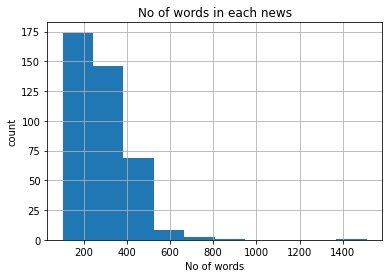

In [100]:
#plotting Distribution of  No of words 
tech_df['word_count'].hist()
plt.title("No of words in each news")
plt.ylabel('count')
plt.xlabel('No of words')

### Observation
- max of news have 150 to 400 words
- 175 news have max 250 aproxx
- some of news are of 1400 words also

In [101]:
%%time
#extracting category and mappibg word by category
maped_category = ner(tech_df['tech'])

CPU times: total: 57.6 s
Wall time: 58 s


In [102]:
#counting word by category
category_df = count_ner_df(maped_category)
category_df

,keyword,count
0,LOC,227
1,NORP,475
2,DATE,1414
3,ORG,3383
4,PERSON,1645
5,GPE,996
6,CARDINAL,2003
7,WORK_OF_ART,60
8,TIME,107
9,MONEY,57


Text(0.5, 0, 'category')

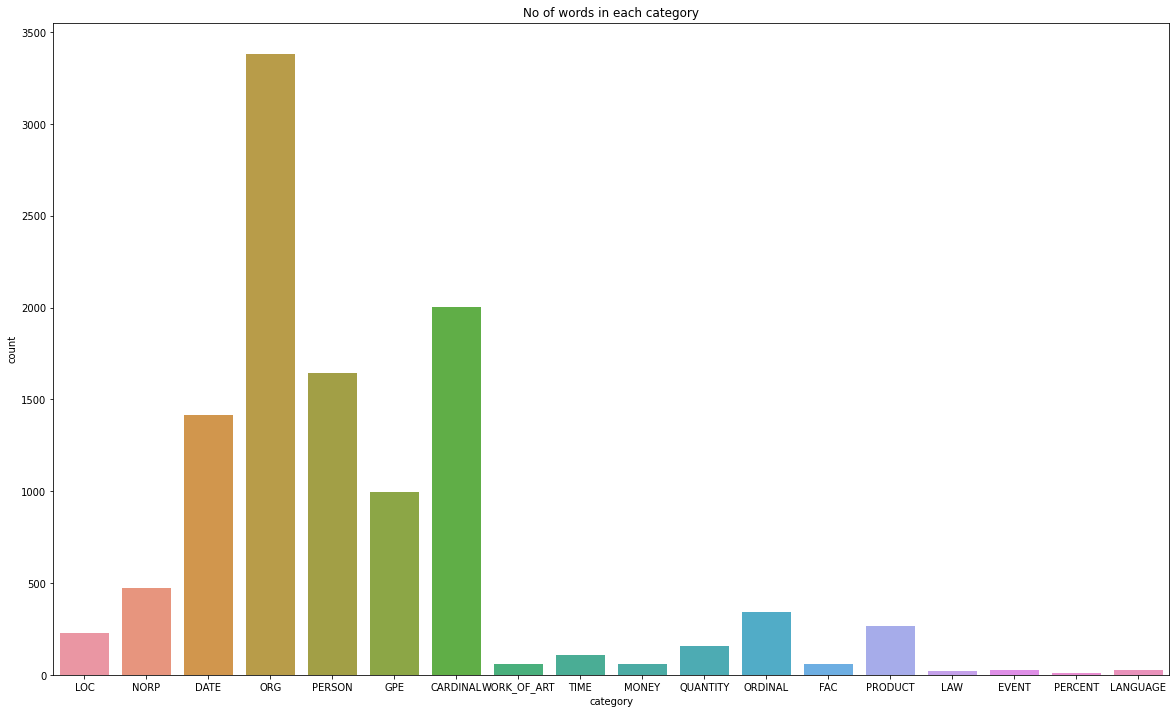

In [103]:
#ploting no. of word in each category
plt.figure(figsize=(20,12))
sns.barplot(x=category_df['keyword'],y=category_df['count'])
plt.title("No of words in each category")
plt.ylabel('count')
plt.xlabel('category')

### Observation
   - max
        - 3383 word are ORG
        - 2003 word are CARDINAL
   - min
        - 11  word are PERCENT
        - 20  word are EVENT
        

#### Top five most frequent word

In [104]:
%%time
#getting top 5 word by TF IDF
get_top_features(tech_df['tech'],5,1)


CPU times: total: 469 ms
Wall time: 481 ms


C:\Users\Rajkumar_Singh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['not', 'people', 'one', 'new', 'would']

### Observation
'not', 'people', 'one', 'new', 'would' are top five most frequent word are top five most frequent word

In [105]:
# people   present in each news
peoplet_count = len(tech_df[tech_df["tech"].str.contains('people')])


Text(0.5, 0, 'words')

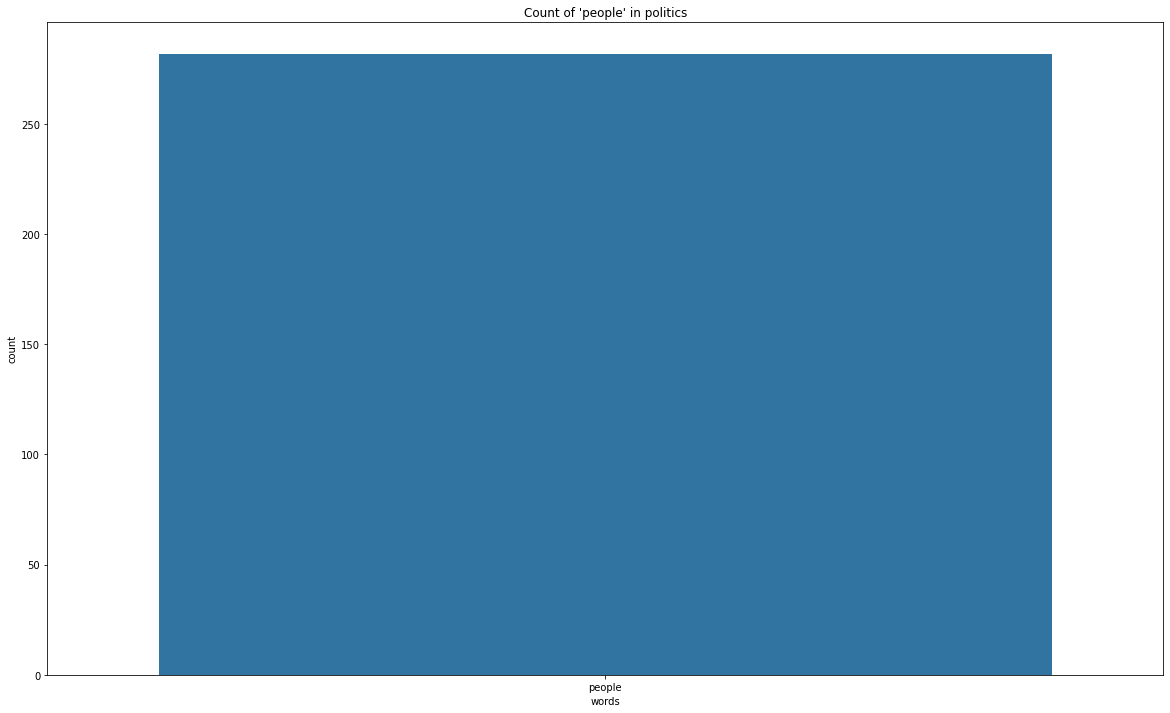

In [106]:
# ploting 'people' present in each news

words = ['people']
counts = [peoplet_count]
plt.figure(figsize=(20,12))
sns.barplot(x=words,y=counts)
plt.title("Count of 'people' in politics")
plt.ylabel('count')
plt.xlabel('words')

### Observation
    - 'people' is present in 282 news
    

In [107]:

#making new feature of counting 'people' count in each news
tech_df['people_count'] = tech_df['tech'].str.count("people")


Text(0.5, 0, 'count of people word in news')

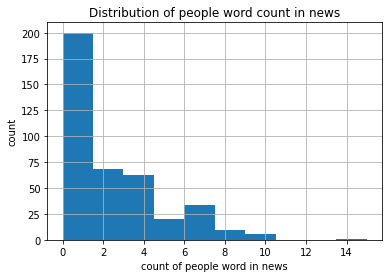

In [108]:
#ploting Distribution of people word count
tech_df['people_count'].hist()
plt.title('Distribution of people word count in news')
plt.ylabel('count')
plt.xlabel('count of people word in news')

### Observation
- most of the news have only 1 or 2 count of people 
- max count is 14,15 in some of the news

In [109]:
%%time
#top 5 bigram of tech
top5_tech_bigram = get_top_features(tech_df['tech'],5,2)
top5_tech_bigram

CPU times: total: 1.16 s
Wall time: 1.15 s


C:\Users\Rajkumar_Singh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['bbc news', 'told bbc', 'mobile phone', 'news website', 'let people']

In [110]:
#5 sentenct related to mobile phone of tech
for i in five_word_contains(tech_df,'tech','mobile phone'):
    print(i)

become common mobile phone conceded ambitious
Casio QV mobile phone Motorola Startac
using old mobile phone not good
access technology mobile phone net help
weakness device mobile phone Alerts tell


### Observation
- we can see that most of the tech news are consume in mobile phone.
- mobile phone are replacing TV and news paper for news
- old phone is not good for now
- Motorola is also maintion.  

In [111]:
#5 sentenct related to news website of tech
for i in five_word_contains(tech_df,'tech','news website'):
    print(i)

told BBC news website utilising blue
told BBC news website utilising blue


### Observation
- BBC is alss have website for cinsume news

In [112]:
#5 sentenct related to let people of tech
for i in five_word_contains(tech_df,'tech','let people'):
    print(i)

distribution model let people download programme
website supposedly let people donate money
provider AOL let people pay monthly
placed DVDs let people make perfect
sequencer designed let people write edit


### Observation
- news are donation and payment done by people

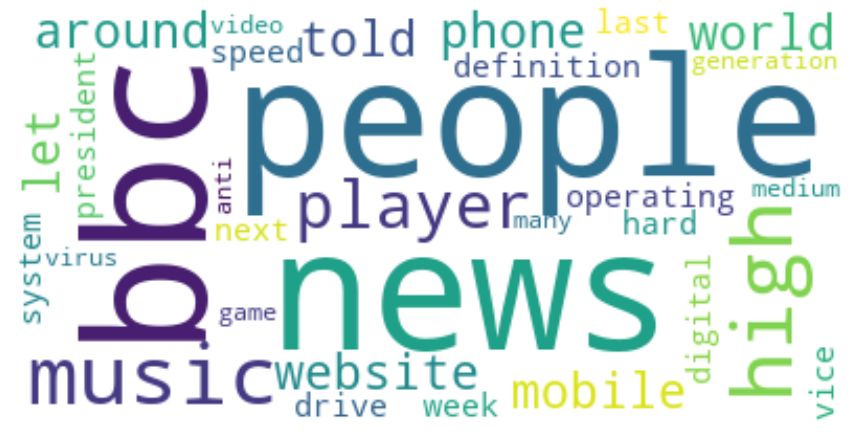

In [113]:
#word cloud of top 20 bigrams
word_cloud(get_top_features(tech_df['tech'],20,2))

# Summary
- News are in 150 to 400 words
- word are mostly of organisation and CARDINAL category
- most common words are 'people'
- top 5 word are occur 1 to 4 time in each news
- top 5 bigrams are 'bbc news', 'told bbc', 'mobile phone', 'news website', 'let people'
- bigrams are saying about
     - tech news are consume in mobile phone
     -  Motorola is also maintion.
    -  BBS also have website to reat news

## Final Conclusion



#### Business 
Chief executive have main role in business.
Inflation is going high so the Interst rate of bank and MF will be low
Japan and Uk stock also start falling 
Economic growth will be slow
#### Entertainment 

We see that many movies are getting nominated to oscars and also doing good in box office. 

Esquive France , gone straight are the top movie

#### Politics 

Now a day not only women giving vote also woman take part in election.
most of the new abut PM of Dutch


####  Sprots 



Player that made appearance after seven year of rest
Moste of the news are about grand slam
grand slam is a tennis evint start in January


#### Tech



We see that everyone is going towards new technology 
Even news are consume in mobile phone
News paper and TV will have less market
Motorola was trying to make dominance in the mobile world in starting

